# ★ Partial Differential Equations ★

In [125]:
# Import modules
import numpy as np
import scipy
import sympy as sym
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import Math
from IPython.display import display

sym.init_printing(use_latex=True)

# 8.1 Parabolic Equations

## Forward Difference Method

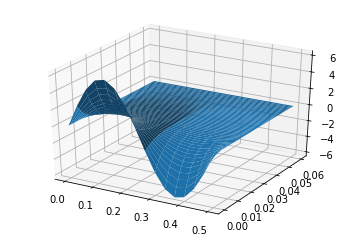

In [370]:
def heatfd(xl, xr, yb, yt, M, N):
    f = lambda x : np.power(np.sin(2 * np.pi * x), 2)
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / np.power(h, 2)
    A = np.diag(1 - 2 * sigma * np.ones(m)) + \
        np.diag(sigma * np.ones(m - 1), 1) + \
        np.diag(sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
    expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
    

    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(A, w[j]) + sigma * ww
        w[j + 1,:] = v
        
    
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, T, w)
    plt.show()
    plt.clf()

        
heatfd(0, 0.5, 0, 0.06, 15, 2000)